# PROJECT CODES
## BRIEF INFORMATION ABOUT THE PROJECT

Every ten years, the United Kingdom undertakes a census of the population, with the most recent
one having been conducted in 2021. The purpose of such a census is to compare different people
across the nation and to provide the government with accurate statistics of the population to
enable better planning, to develop policies, and to allocate certain funding.
In the project, you will be provided with a mock census of an imaginary town taken in 2025. I
would like you to consider yourselves to be part of a local government team who will be making
decisions on what to do with an unoccupied plot of land and what to invest in. To address these
questions, you will need to clean and analyse the mock census data provided.


In [362]:
# Import all neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [363]:
# Read Dataset
df = pd.read_csv("T1_A25census-2-Updated.csv")

In [364]:
# Summary of Data Set
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7773 entries, 0 to 7772
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     7773 non-null   int64 
 1   House Number                   7773 non-null   object
 2   Street                         7773 non-null   object
 3   First Name                     7773 non-null   object
 4   Surname                        7773 non-null   object
 5   Age                            7773 non-null   object
 6   Relationship to Head of House  7299 non-null   object
 7   Marital Status                 5960 non-null   object
 8   Gender                         7773 non-null   object
 9   Occupation                     7773 non-null   object
 10  Infirmity                      52 non-null     object
 11  Religion                       3316 non-null   object
dtypes: int64(1), object(11)
memory usage: 728.8+ KB


In [365]:
# Drop the extra index column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

In [366]:
# Retrns for missing values (NaN values) for dataframe
df.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House     474
Marital Status                   1813
Gender                              0
Occupation                          0
Infirmity                        7721
Religion                         4457
dtype: int64

In [367]:
# Check dataset for empty entries
(df == " ").sum()


House Number                     0
Street                           0
First Name                       2
Surname                          0
Age                              1
Relationship to Head of House    1
Marital Status                   1
Gender                           1
Occupation                       1
Infirmity                        6
Religion                         3
dtype: int64

In [368]:
#Returns unique values for age column
df['Age'].unique()

array(['56', '57', '15', '44', '9', '72', '38', '5', '3', '41', '13',
       '73', '45', '36', '51', '23', '33', '4', '0', '30', '6', '2', '21',
       '28', '27', '83', '85', '19', '40', '16', '89', '65', '47', '20',
       '68', '66', '37', '32', '14', '10', '86', '69', '58', '22', '59',
       '63', '46', '39', '53', '42', '12', '8', '1', '24', '50', '26',
       '70', '54', '43', '60', '18', '11', '29', '76', '64', '34', '52',
       '35', '7', '48', '25', '75', '79', '71', '17', '49', '55', '74',
       '78', '31', '62', '67', '61', '72.38784457', '74.38784457', '84',
       '88', '80', '77', '81', '87', '101', '104', '82', '91', '102',
       '97', '90', '96', '98', '93', '103', '80.57582061', '77.57582061',
       '7.11E-15', '92', '105', '94', ' ', '99'], dtype=object)

In [369]:
# Check Age column for NaN values  
df['Age'].isna().sum()

np.int64(0)

In [370]:
df[df['Age'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5998,40,Skylock Curve,Jodie,Clarke,,Daughter,NaN,Female,Child,NaN,NaN


In [371]:
# Convert to numeric, coercing errors (like empty strings) to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
children_age = df[df['Age'] <= 12]
# Fill missing ages with the mean of children's age
df['Age'] = df['Age'].fillna(children_age['Age'].mean())
df['Age'] = df['Age'].astype(int)

In [372]:
df[df['Age'] > 122]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [373]:
df[df['Age'] < 0]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [374]:
minor_married = (df['Age'] < 18) & (df['Marital Status'] == 'Married')
minor_married

0       False
1       False
2       False
3       False
4       False
        ...  
7768    False
7769    False
7770    False
7771    False
7772    False
Length: 7773, dtype: bool

In [375]:
(df['Age'] == " ").sum()

np.int64(0)

In [376]:
df['Age'].value_counts(normalize=True) * 100

Age
43     1.878297
35     1.775376
36     1.775376
38     1.749646
22     1.723916
         ...   
103    0.012865
92     0.012865
105    0.012865
94     0.012865
99     0.012865
Name: proportion, Length: 104, dtype: float64

In [377]:
# Returns unique values for the Religion column 
df['Religion'].unique()

array(['Christian', nan, 'Catholic', 'Methodist', 'Muslim', 'Jewish',
       'Sikh', 'Buddist', 'Bahai', 'Sith', 'Private', 'Baptist', ' ',
       'Orthodoxy'], dtype=object)

In [378]:
df['Religion'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Christian
1       Christian
2             NaN
3       Christian
4             NaN
          ...    
7768    Christian
7769          NaN
7770          NaN
7771    Christian
7772          NaN
Name: Religion, Length: 7773, dtype: object>

In [379]:
# Checks Religion column for NaN values
df[df['Religion'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2,1,Forgotten Gardens,Nicole,White,15,Daughter,NaN,Female,Student,NaN,NaN
4,2,Forgotten Gardens,Jeffrey,John,9,Son,NaN,Male,Student,NaN,NaN
5,3,Forgotten Gardens,Emily,Henderson,72,Head,Widowed,Female,Retired Public librarian,Unknown Infection,NaN
7,4,Forgotten Gardens,Gerard,Mills,5,Son,NaN,Male,Student,NaN,NaN
8,4,Forgotten Gardens,Anna,Mills,5,Daughter,NaN,Female,Student,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7766,1,Adams Cottage,Tracey,Singh,8,Daughter,NaN,Female,Student,NaN,NaN
7767,1,Adams Cottage,Abdul,Singh,8,Son,NaN,Male,Student,NaN,NaN
7769,1,Fletcher Farmhouse,Rachael,Hudson,0,Daughter,NaN,Female,Child,NaN,NaN
7770,1,Fletcher Farmhouse,Stephen,Shepherd,54,Sibling,Divorced,Male,"Accountant, chartered public finance",NaN,NaN


In [380]:
# Checks for empty entries or white space in Religion Column
df[df['Religion'].str.strip() =='']  

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6389,5,Wilkins Street,Catherine,Hargreaves,45,Head,Divorced,female,"Engineer, communications",NaN,
6902,31,Cottingham Drive,Ellie,Newton,11,Daughter,NaN,Female,Student,NaN,
7260,13,Monument Lodge,Brenda,Shaw,22,Daughter,Single,Female,University Student,NaN,


In [381]:
# Check for Minors with missing Religion
condition_missing_religion = df['Religion'].isna()  # Checks for NaN values (missing religion)
condition_under_18 = df['Age'] < 18              # Checks if age is strictly less than 18

# Combine the conditions using the logical AND operator (&) and filter the DataFrame
missing_religion_under_18 = df[condition_missing_religion & condition_under_18]
missing_religion_under_18 


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2,1,Forgotten Gardens,Nicole,White,15,Daughter,NaN,Female,Student,NaN,NaN
4,2,Forgotten Gardens,Jeffrey,John,9,Son,NaN,Male,Student,NaN,NaN
7,4,Forgotten Gardens,Gerard,Mills,5,Son,NaN,Male,Student,NaN,NaN
8,4,Forgotten Gardens,Anna,Mills,5,Daughter,NaN,Female,Student,NaN,NaN
9,4,Forgotten Gardens,Leslie,Jones,3,Son,NaN,Male,Child,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7747,1,Matthews Rectory,Hollie,Martin,3,Daughter,NaN,Female,Child,NaN,NaN
7748,1,Matthews Rectory,Patrick,Martin,0,Son,NaN,Male,Child,NaN,NaN
7766,1,Adams Cottage,Tracey,Singh,8,Daughter,NaN,Female,Student,NaN,NaN
7767,1,Adams Cottage,Abdul,Singh,8,Son,NaN,Male,Student,NaN,NaN


In [382]:
# Clean 'Religion'
# Replace blanks/NaN with 'No Religion' 

def fill_missing_religion(row, grouped_data):
    # Check if the 'Religion' value is missing or 'None'
    if pd.isna(row['Religion']) or row['Religion'] == 'None':
        try:
            # Get the household group
            grouped_home = grouped_data.get_group((row['House Number'], row['Street']))
            
            # Get unique religions in the household, ignoring 'None'
            religions = grouped_home['Religion'].replace('None', np.nan).dropna().unique()
            
            # If there's exactly one unique religion found in the household, use it
            if len(religions) == 1:
                return religions[0]
            else:
                return 'No Religion' # Default fallback
        except KeyError:
            return 'No Religion'
    else:
        return row['Religion']

# Group by Household
grouped_data = df.groupby(['House Number', 'Street'])

# Apply the function
df['Religion'] = df.apply(lambda row: fill_missing_religion(row, grouped_data), axis=1)

# Define the list of religions you want to group together
religions_to_change = ['Private', 'Sith', 'Orthodoxy', 'Bahai','Buddist']

df['Religion'].replace(religions_to_change, 'Other Religion', inplace=True)

In [383]:
#Returns unique values for First Name column
#df['First Name'].unique()

In [384]:
# Check for empty/blank entries in the First Name column
df[df['First Name'].str.strip() == ""]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
267,51,Fish Harbor,,Armstrong,55,NaN,Single,Male,Unemployed,NaN,Catholic
6421,19,Wilkins Street,,Clarke,69,Head,Single,Male,Retired Community development worker,NaN,Christian


In [385]:
# Replace Blank First Names with Unknown
df['First Name'] = df['First Name'].replace(' ', 'Unknown')

In [386]:
# Cross-Check for empty/blank entries in the First Name column
df[df['First Name'].str.strip() == ""]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [387]:
# Returns unique values for Relationship to Head of House column
df['Relationship to Head of House'].unique()

array(['Head', 'Husband', 'Daughter', 'Son', nan, 'Wife', 'Partner',
       'Lodger', 'Sibling', 'Visitor', 'Cousin', 'Adopted Son',
       'Granddaughter', 'Grandson', 'Adopted Daughter', 'Step-Son',
       'Step-Daughter', 'Neice', 'Nephew', 'Adopted Granddaughter', ' '],
      dtype=object)

In [388]:
# Check Relationship to Head of House column for NaN values 
df[df['Relationship to Head of House'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
19,7,Forgotten Gardens,Harry,Hughes,23,NaN,Single,Male,Maintenance engineer,NaN,No Religion
20,7,Forgotten Gardens,Colin,Wells,33,NaN,Single,Male,Television production assistant,NaN,Catholic
29,10,Forgotten Gardens,Leon,Ward,28,NaN,Single,Male,"Programmer, applications",NaN,No Religion
30,10,Forgotten Gardens,Lydia,Pritchard,27,NaN,Single,female,Lobbyist,NaN,Methodist
47,7,Quayside Drive,Frank,Knight,20,NaN,Single,Male,University Student,NaN,Catholic
...,...,...,...,...,...,...,...,...,...,...,...
7642,13,North Glens,Mandy,Evans,29,NaN,Single,Female,"Engineer, site",NaN,No Religion
7643,13,North Glens,Terry,Slater,51,NaN,Single,Male,Clothing/textile technologist,NaN,Christian
7679,23,North Glens,Danny,Johnson,19,NaN,Single,Male,University Student,NaN,Catholic
7752,1,Hutchinson Longhouse,Diana,Smith,19,NaN,Single,Female,University Student,NaN,No Religion


In [389]:
# Check the Relationship to Head of House column for empty/blank entries
df[df['Relationship to Head of House'].str.strip() == ""]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2240,19,Norwich Cliffs,Emily,Hill,19,,Single,Female,University Student,NaN,Christian


In [390]:
# Ensure those under 18 are not Head
minor_head = (df['Age'] < 18) & (df['Relationship to Head of House'] == 'Head')
df.loc[minor_head & (df['Gender'] == 'Male'), 'Relationship to Head of House'] = 'Son'
df.loc[minor_head & (df['Gender'] == 'Female'), 'Relationship to Head of House'] = 'Daughter'

# Endeavour only one Head exits per household and it should be the oldest person

# Check the hierachy of the person's age within their house group.
# The oldest person gets rank 1. 

df['age_rank'] = df.groupby(['House Number', 'Street'])['Age'].rank(method='first', ascending=False)

# Identify and demote any 'Head' who is NOT rank 1.
demote = (df['Relationship to Head of House'] == 'Head') & (df['age_rank'] > 1)

# Demote the identified false 'Heads' to 'Other Relative'.
df.loc[demote, 'Relationship to Head of House'] = 'Other Relative'

df['Relationship to Head of House'] = df['Relationship to Head of House'].replace(' ', 'No Relation')
df['Relationship to Head of House'] = df['Relationship to Head of House'].fillna('No Relation')


#Clean up temporary column.
df = df.drop(columns=['age_rank'])

In [391]:
filt = df['Relationship to Head of House'].str.contains('Other Relative', na=False) 
df[filt]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Forgotten Gardens,Laura,White,56,Other Relative,Married,Female,Unemployed,NaN,Christian
10,5,Forgotten Gardens,Molly,Conway,38,Other Relative,Married,Female,"Education officer, museum",NaN,No Religion
28,10,Forgotten Gardens,Karl,Green,21,Other Relative,Single,Male,University Student,NaN,Catholic
35,1,Quayside Drive,Jasmine,Knowles,83,Other Relative,Married,Female,Retired Armed forces technical officer,NaN,Methodist
55,10,Quayside Drive,Janice,Smith,86,Other Relative,Married,Female,Retired Neurosurgeon,NaN,Catholic
...,...,...,...,...,...,...,...,...,...,...,...
7719,1,Smith Manor,Paula,Little,42,Other Relative,Married,Female,"Education officer, environmental",NaN,Christian
7741,1,Cancer Palace,Alison,Ferguson,45,Other Relative,Married,Female,"Surveyor, planning and development",NaN,Christian
7746,1,Matthews Rectory,Marian,Martin,42,Other Relative,Divorced,Female,Oceanographer,NaN,Christian
7760,1,Elephant Folly,Amelia,Black,37,Other Relative,Single,Female,Control and instrumentation engineer,NaN,Methodist


In [392]:
# Cross-Check for misssing values(NaN)
df[df['Relationship to Head of House'].isna()]


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [393]:
# Returns unique values for the Marital Status column
df['Marital Status'].unique()

array(['Married', nan, 'Divorced', 'Widowed', 'Single', 'M', 'D', ' ',
       'S', 'W'], dtype=object)

In [394]:
# Check the Marital Status column for NaN values 
df[df['Marital Status'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2,1,Forgotten Gardens,Nicole,White,15,Daughter,NaN,Female,Student,NaN,Christian
4,2,Forgotten Gardens,Jeffrey,John,9,Son,NaN,Male,Student,NaN,Christian
7,4,Forgotten Gardens,Gerard,Mills,5,Son,NaN,Male,Student,NaN,Catholic
8,4,Forgotten Gardens,Anna,Mills,5,Daughter,NaN,Female,Student,NaN,Catholic
9,4,Forgotten Gardens,Leslie,Jones,3,Son,NaN,Male,Child,NaN,Catholic
...,...,...,...,...,...,...,...,...,...,...,...
7747,1,Matthews Rectory,Hollie,Martin,3,Daughter,NaN,Female,Child,NaN,Christian
7748,1,Matthews Rectory,Patrick,Martin,0,Son,NaN,Male,Child,NaN,Christian
7766,1,Adams Cottage,Tracey,Singh,8,Daughter,NaN,Female,Student,NaN,Christian
7767,1,Adams Cottage,Abdul,Singh,8,Son,NaN,Male,Student,NaN,Christian


In [395]:
# Clean Marital Status

# Fix abbreviations and handle textual "NA" or blanks
marital_map = {
    'M': 'Married', 'S': 'Single', 'D': 'Divorced', 'W': 'Widowed',
    ' ': np.nan, 'NA': np.nan, 'NaN': np.nan
}

df['Marital Status'] = df['Marital Status'].replace(marital_map)

# All Minors (Age < 18) are Not Applicable
df.loc[df['Age'] < 18, 'Marital Status'] = 'Not Applicable'

# All Husbands/Wives are 'Married' (Fixes missing values for spouses)
df.loc[df['Relationship to Head of House'].isin(['Husband', 'Wife']), 'Marital Status'] = 'Married'

# Fill any remaining missing values with 'Single' (Most common default)
df['Marital Status'] = df['Marital Status'].replace(' ','Single')
df['Marital Status'] = df['Marital Status'].fillna('Single')


print("Marital Status Nulls:", df['Marital Status'].isna().sum())

Marital Status Nulls: 0


In [396]:
# Cross-check for missing (NaN)values after cleaning
df[df['Marital Status'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [397]:
# Returns unique values for the Gender column
df['Gender'].unique()

array(['Female', 'Male', 'female', 'M', 'm', 'f', 'F', 'male', ' '],
      dtype=object)

In [398]:
# Checking the Gender column for missing (NaN) values
df[df['Gender'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [399]:
# Clean Gender

gender_map = {'male': 'Male', 'm': 'Male', 'M': 'Male', 'female': 'Female', 'f': 'Female', 'F': 'Female', ' ': np.nan}

df['Gender'] = df['Gender'].replace(gender_map)
df.loc[(df['Gender'].isnull()) & (df['Relationship to Head of House'] == 'Husband'), 'Gender'] = 'Male'
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [400]:
# Checking unique values from Occupation
df['Occupation'].unique()

array(['Unemployed', 'Education officer, community', 'Student', ...,
       'Retired Civil Service administrator',
       'Retired Research officer, government',
       'Retired Consulting civil engineer'], shape=(1086,), dtype=object)

In [401]:
# Cross-checking for NaN values 
df[df['Occupation'].isna()] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [402]:
# Checking for blank/empty entires and white space
df[df['Occupation'].str.strip() =='']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
949,16,Newfound Creek,Danielle,Wood,70,Head,Single,Female,,NaN,Christian


In [403]:
# Clean Occupation
df['Occupation'] = df['Occupation'].replace(' ', 'Retired')


In [404]:
# Cross-check for blank entries/white space
df[df['Occupation'].str.strip() =='']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [405]:
# Unique values from Infirmity8
df['Infirmity'].unique

<bound method Series.unique of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
7768    NaN
7769    NaN
7770    NaN
7771    NaN
7772    NaN
Name: Infirmity, Length: 7773, dtype: object>

In [406]:
# Returns missing values to the Infirmity column
df[df['Infirmity'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Forgotten Gardens,Laura,White,56,Other Relative,Married,Female,Unemployed,NaN,Christian
1,1,Forgotten Gardens,Elliot,White,57,Husband,Married,Male,"Education officer, community",NaN,Christian
2,1,Forgotten Gardens,Nicole,White,15,Daughter,Not Applicable,Female,Student,NaN,Christian
3,2,Forgotten Gardens,Michelle,John,44,Head,Divorced,Female,"Administrator, arts",NaN,Christian
4,2,Forgotten Gardens,Jeffrey,John,9,Son,Not Applicable,Male,Student,NaN,Christian
...,...,...,...,...,...,...,...,...,...,...,...
7768,1,Fletcher Farmhouse,Beverley,Hudson,30,Other Relative,Divorced,Female,"Research officer, trade union",NaN,Christian
7769,1,Fletcher Farmhouse,Rachael,Hudson,0,Daughter,Not Applicable,Female,Child,NaN,Christian
7770,1,Fletcher Farmhouse,Stephen,Shepherd,54,Sibling,Divorced,Male,"Accountant, chartered public finance",NaN,Christian
7771,1,Fletcher Farmhouse,William,French,48,Lodger,Single,Male,Unemployed,NaN,Christian


In [407]:
# Check the Infirmity column for blank entrie/white space
df[df['Infirmity'].str.strip() ==""]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
430,1,Matthews River,Lawrence,Parker,45,Husband,Married,Male,Lawyer,,Methodist
509,23,Butcher Burgs,Ian,Jones,72,Head,Single,Male,Retired Systems analyst,,Christian
2012,32,Wakefieldthorpe Street,William,Brown,55,Head,Married,Male,Print production planner,,Christian
2818,2,Aquarius Lane,Vincent,Greenwood,28,Son,Single,Male,Therapeutic radiographer,,Christian
6208,4,Sullivan Ridges,Alice,Cook,15,Daughter,Not Applicable,Female,Student,,Catholic
6642,21,Iqbal Plaza,Adrian,Brown,60,Head,Single,Male,Maintenance engineer,,Christian


In [408]:
# Clean 'Infirmity'Column
# Replace empty strings/blanks with 'None'

df['Infirmity'] = df['Infirmity'].replace(" ", 'None')
df['Infirmity'] = df['Infirmity'].fillna('None')

In [409]:
df[df['Infirmity'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [410]:
df[df['Infirmity'].str.strip() ==""]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [411]:
df['Infirmity'].unique

<bound method Series.unique of 0       None
1       None
2       None
3       None
4       None
        ... 
7768    None
7769    None
7770    None
7771    None
7772    None
Name: Infirmity, Length: 7773, dtype: object>

In [412]:
df['House Number'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', 'One', '102', '103', '104', '105', '106', '107', '108',
       '109', '110', '111', '112', '113', '114', '115', '116', '117',
       '118', '119', '120', '121', '122', '123', '124', '125', '126',
       '127', '128', '129', '130', '131', '132', '133', '134', '135',
       '136', '137', '138', '139', '140', '141', '142', '143', '1

In [413]:
df[df['House Number'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [414]:
df['Street'].unique

<bound method Series.unique of 0        Forgotten Gardens
1        Forgotten Gardens
2        Forgotten Gardens
3        Forgotten Gardens
4        Forgotten Gardens
               ...        
7768    Fletcher Farmhouse
7769    Fletcher Farmhouse
7770    Fletcher Farmhouse
7771    Fletcher Farmhouse
7772    Fletcher Farmhouse
Name: Street, Length: 7773, dtype: object>

In [415]:
df[df['Street'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [416]:
# Save the cleaned data
df.to_csv('Cleaned_census_data.csv', index=False)

In [417]:
# Create age cohorts
# Total Population
total_population = df.shape[0]

bins = [0, 4, 17, 24, 64, 85, 120]
labels = ['0-4 (Pre-School)', '5-17 (School-Age)', '18-24 (Young Adult/Student)','25-64 (Working Age)', '65-85 (Retirement)', '85+ (Elderly)']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, ordered=True)

# Calculate distribution by gender
age_dist = df.groupby(['Age_Group', 'Gender']).size().unstack(fill_value=0)
age_dist['Total'] = age_dist.sum(axis=1)
age_dist['Percentage'] = (age_dist['Total'] / total_population) * 100

print("\nAge Distribution Analysis")
print(age_dist)

# Key Metrics
school_age_pop = age_dist.loc['5-17 (School-Age)', 'Total']
future_retirement_pop = df[(df['Age'] >= 55) & (df['Age'] <= 64)].shape[0]
retirement_age_pop = age_dist.loc['65-85 (Retirement)':'85+ (Elderly)', 'Total'].sum()

print(f"\nPopulation in School Age (5-17): {school_age_pop} ({school_age_pop/total_population*100:.1f}%)")
print(f"Population Approaching Retirement (55-64): {future_retirement_pop} ({future_retirement_pop/total_population*100:.1f}%)")
print(f"Population in Retirement Age (65+): {retirement_age_pop} ({retirement_age_pop/total_population*100:.1f}%)")




Age Distribution Analysis
Gender                       Female  Male  Total  Percentage
Age_Group                                                   
0-4 (Pre-School)                171   202    373    4.798662
5-17 (School-Age)               641   742   1383   17.792358
18-24 (Young Adult/Student)     417   386    803   10.330632
25-64 (Working Age)            2258  1981   4239   54.534929
65-85 (Retirement)              461   368    829   10.665123
85+ (Elderly)                    42    45     87    1.119259

Population in School Age (5-17): 1383 (17.8%)
Population Approaching Retirement (55-64): 788 (10.1%)
Population in Retirement Age (65+): 916 (11.8%)


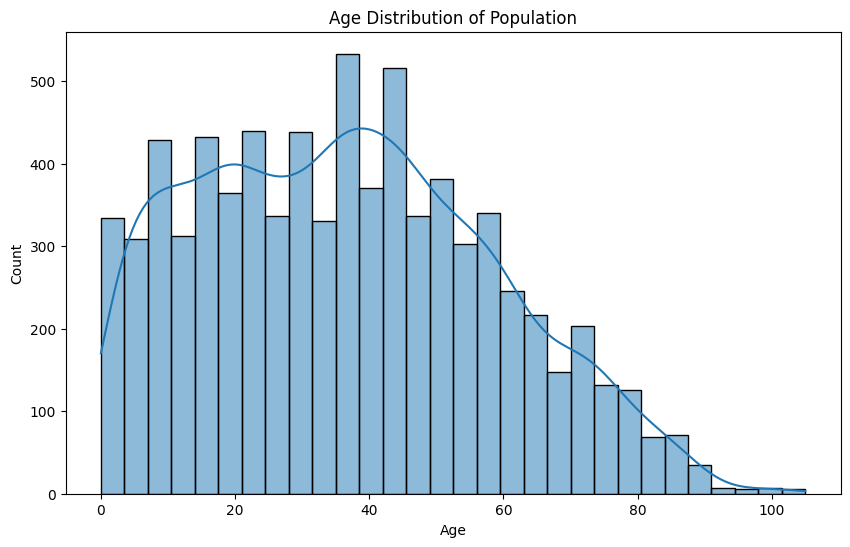

In [418]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age',bins=30, kde=True)
plt.title('Age Distribution of Population')
plt.savefig('age_distribution.png')



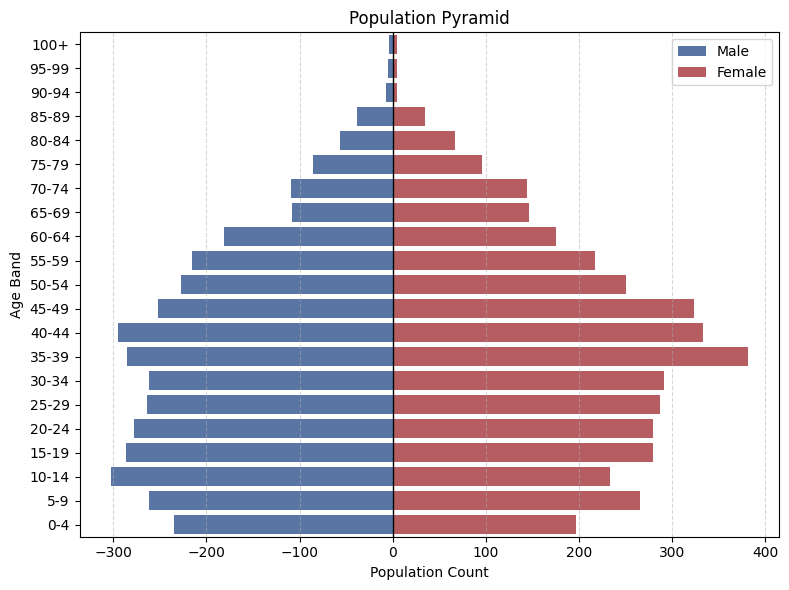

In [419]:
# Define Explicit Bins up to 100+
bins = list(range(0, 101, 5)) + [np.inf]
labels = [f"{i}-{i+4}" for i in range(0, 100, 5)] + ['100+']

df['Age Band'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by Age Group and Gender
age_p = df.groupby(['Age Band', 'Gender'],observed=True).size().unstack(fill_value=0).reset_index()

# Ensure all age groups are present
all_ages = pd.DataFrame({'Age Band': labels})
age_p= pd.merge(all_ages, age_p, on='Age Band', how='left').fillna(0)

# Create negative values for Male counts
age_p['Male_Negative'] = age_p['Male'] * -1

# Plotting
plt.figure(figsize=(8, 6))
plot_order = labels[::-1]

# Plot Males (Left side)
sns.barplot(x='Male_Negative', y='Age Band', data=age_p, order=plot_order, 
            color='#4c72b0', label='Male')

# Plot Females (Right side)
bar_plot = sns.barplot(x='Female', y='Age Band', data=age_p, order=plot_order, 
                       color='#c44e52', label='Female')

# Formatting
plt.xlabel("Population Count")
plt.ylabel("Age Band")
plt.title("Population Pyramid")
plt.legend()
plt.axvline(0, color='black', linewidth=1)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Fix X-axis labels to show positive numbers
ticks = bar_plot.get_xticks()
#bar_plot.set_xticklabels([int(abs(tick)) for tick in ticks])

plt.tight_layout()
plt.show()

#df = df.drop(columns=['Age Band'])

In [420]:
# Calculate People Per House (PPH)
occupancy = df.groupby(['Street', 'House Number']).size().reset_index(name='Occupants')
average_occupancy = occupancy['Occupants'].mean().item()

# Marital Status Distribution
marital_dist = df['Marital Status'].value_counts(normalize=True).mul(100).to_frame().apply(lambda x: f'{x[0]:.2f}%',axis=1)

print("\nHousing and Occupancy Analysis")
print(f"Average People Per House (PPH): {average_occupancy:.2f}")
print("\nMarital Status Distribution (Adults Only):")
print(marital_dist)

# Housing Demand by Household Size
# Single/Couple households (1-2 occupants) vs. Family households (3+ occupants)
small_households = occupancy[occupancy['Occupants'] <= 2].shape[0]
large_households = occupancy[occupancy['Occupants'] >= 3].shape[0]
total_dwellings = occupancy.shape[0]

print(f"\nPercentage of Small Households (1-2 PPH): {small_households/total_dwellings*100:.1f}%")
print(f"Percentage of Large Households (3+ PPH): {large_households/total_dwellings*100:.1f}%")


Housing and Occupancy Analysis
Average People Per House (PPH): 2.67

Marital Status Distribution (Adults Only):
Marital Status
Single            34.23%
Married           28.24%
Not Applicable    23.35%
Divorced           9.03%
Widowed            5.15%
dtype: object

Percentage of Small Households (1-2 PPH): 55.2%
Percentage of Large Households (3+ PPH): 44.8%


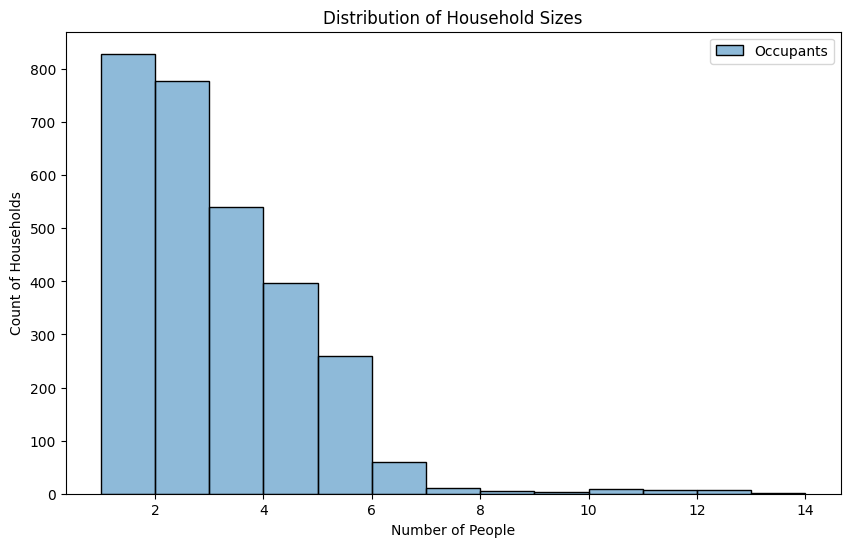

In [421]:
plt.figure(figsize=(10, 6))
sns.histplot(occupancy, bins=range(1, 15), kde=False)
plt.title('Distribution of Household Sizes')
plt.xlabel('Number of People')
plt.ylabel('Count of Households')
plt.savefig('household_size_distribution.png')


Commuter Analysis (Status-Based Definition)
Total Likely Commuters (Age 18+): 4720
Adult Population (Age 18+): 5958
Commuter Percentage (of Adults): 79.22%


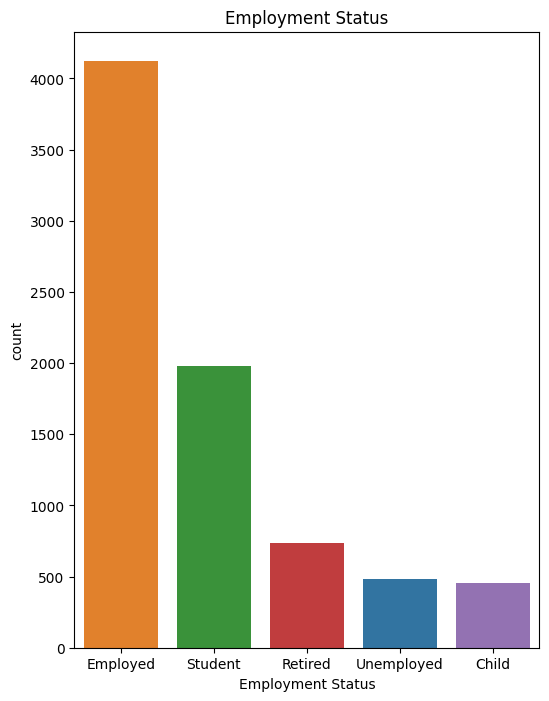

In [422]:
# Employment / Occupation Status

# Simple categorization
def occupation_cat(occ):
    occ = str(occ).lower()
    if 'student' in occ:
        return 'Student'
    elif 'retired' in occ:
        return 'Retired'
    elif 'unemployed' in occ:
        return 'Unemployed'
    elif 'child' in occ:
        return 'Child'
    else:
        return 'Employed'
        
# Apply the categorization to create a new status column
df['Employment Status'] = df['Occupation'].apply(occupation_cat)

# Define the 'Likely Commuter' groups
# A broad commuter is defined as someone who is EMPLOYED or a STUDENT.
commuter_statuses = ['Employed', 'Student']

# Flag adults (Age 18+) who fall into the commuter categories
df['Main Commuters'] = ((df['Age'] >= 18) & (df['Employment Status'].isin(commuter_statuses)))

# Perform the final calculation
likely_commuters_broad = df[df['Main Commuters']].shape[0]
adult_population = df[df['Age'] >= 18].shape[0]
commuter_percentage_broad = (likely_commuters_broad / adult_population) * 100

print("\nCommuter Analysis (Status-Based Definition)")
print(f"Total Likely Commuters (Age 18+): {likely_commuters_broad}")
print(f"Adult Population (Age 18+): {adult_population}")
print(f"Commuter Percentage (of Adults): {commuter_percentage_broad:.2f}%")

plt.figure(figsize=(6, 8))
sns.countplot(data=df, x='Employment Status',hue="Employment Status", order=df['Employment Status'].value_counts().index)
plt.title('Employment Status')
plt.savefig('employment_status.png')

In [423]:
# Analyze unemployment in the working age (18-64)
working_age_df = df[(df['Age'] >= 18) & (df['Age'] <= 64)].copy()

unemployed_count = working_age_df[working_age_df['Occupation'] == 'Unemployed'].shape[0]
total_working_age = working_age_df.shape[0]
unemployment_rate = (unemployed_count / total_working_age) * 100

print("\nEmployment Analysis (Age 18-64)")
print(f"Unemployed Population (18-64): {unemployed_count}")
print(f"Total Working Age Population: {total_working_age}")
print(f"Unemployment Rate (18-64): {unemployment_rate:.2f}%")

# Analyze unemployment by age group
working_age_df['Age_18_64'] = pd.cut(working_age_df['Age'], bins=[18, 24, 39, 64], labels=['18-24', '25-39', '40-64'], right=True)
unemployment_by_cohort = working_age_df.groupby('Age_18_64',observed=False)['Occupation'].apply(lambda x: (x == 'Unemployed').sum() / len(x) * 100,) 

print("\nUnemployment Rate by Working Age Cohort:")
print(unemployment_by_cohort.apply(lambda x: f'{x:.2f}%'))


Employment Analysis (Age 18-64)
Unemployed Population (18-64): 441
Total Working Age Population: 5042
Unemployment Rate (18-64): 8.75%

Unemployment Rate by Working Age Cohort:
Age_18_64
18-24     3.07%
25-39     9.72%
40-64    10.04%
Name: Occupation, dtype: object


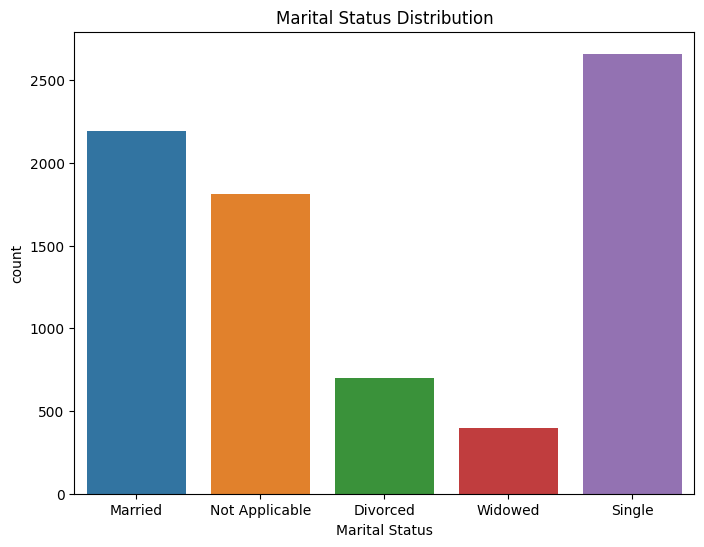

In [424]:
#  Marital Status Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Marital Status',hue='Marital Status')
plt.title('Marital Status Distribution')
plt.savefig('marital_status.png')


Religious Affiliations (Top 5)
Population with Stated Religion: 5,115

Distribution of Stated Religions:
Religion
Christian    52.79%
Catholic     25.96%
Methodist    15.05%
Muslim        3.32%
Sikh          1.58%
dtype: object


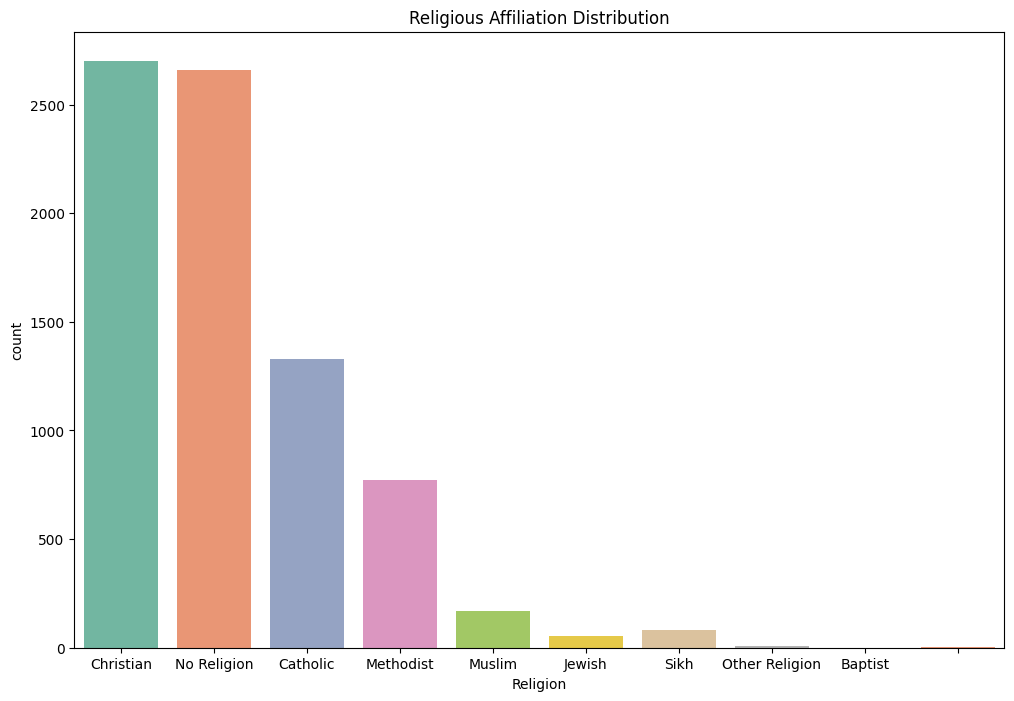

In [425]:
# Analyze religious affiliations (excluding 'NA' and 'None')
religious_affiliations = df[~df['Religion'].isin(['NA', 'No Religion']) & (df['Religion'].notna())]['Religion'].value_counts()
religious_dist = religious_affiliations.head(5).div(religious_affiliations.sum()).mul(100).to_frame().apply(lambda x: f'{x[0]:.2f}%', axis=1)

total_stated_religion_value = religious_affiliations.sum().item()

print(f"\nReligious Affiliations (Top 5)")
print(f"Population with Stated Religion: {total_stated_religion_value:,.0f}")
print(f"\nDistribution of Stated Religions:")
print(religious_dist)

#  Religious Affiliation Distribution
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Religion',hue='Religion',palette = "Set2")
plt.title('Religious Affiliation Distribution')
plt.savefig('religious_affiliation.png')


In [426]:
df.groupby('Marital Status')['Age'].describe().reset_index()


,Marital Status,count,mean,std,min,25%,50%,75%,max
0,Divorced,702.0,43.467236,18.057791,18.0,28.25,42.0,55.0,104.0
1,Married,2195.0,49.871071,16.607492,18.0,37.00,48.0,62.0,102.0
2,Not Applicable,1815.0,8.946556,5.018039,0.0,5.00,9.0,13.0,17.0
3,Single,2661.0,38.090567,14.154958,18.0,26.00,36.0,48.0,101.0
4,Widowed,400.0,65.382500,19.303828,18.0,58.00,71.0,78.0,105.0


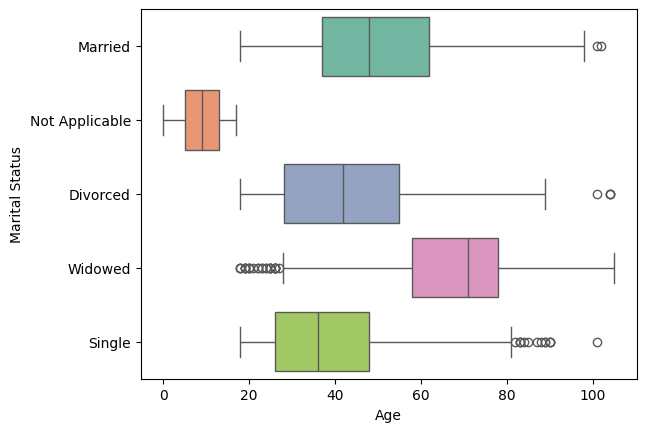

In [427]:
palette= "Set2"
Mage_box=sns.boxplot(data = df, x = "Age", y = "Marital Status",hue='Marital Status',palette = palette)
plt.savefig('Mage_box.png')

### Calculate the Birth Rate

In [428]:
children_aged_zero = df[df['Age'] == 0].shape[0]

women_25_29 = df[(df['Age'] >= 25) & (df['Age'] <= 29) & (df['Gender'].str.lower() =='female')].shape[0]

# Calculate the Birth rate
birth_per_100_000 = (children_aged_zero/women_25_29)*100_000
br_per_100_000 = format( birth_per_100_000 ,".2f")
print(f"Birth Rate:{br_per_100_000}")


Birth Rate:20557.49


In [429]:
# Evolving Birth Rate

#Determine the number of children aged 4
children_aged_4 = df[df['Age'] == 4].shape[0]
women_30_34 = df[(df['Age'] >= 30) & (df['Age'] <= 34) & (df['Gender'].str.lower() =='female')].shape[0]

# Rate per 100,000 for children aged 4 & women aged 30-34
past_birth_per_100_000 = format(children_aged_4/women_30_34 * 100_000,'.2f') if women_30_34 > 0 else None
print(past_birth_per_100_000)

33676.98


### Death Rate

In [430]:
# Total Population
total_population = df.shape[0]

# number ofpeople in the age range 56-60
range_56_60 = df[(df['Age'] >= 56) & (df['Age']<=60)].shape[0]

#number of people in the age range 61-65
range_61_65 = df[(df['Age']>= 61) & (df['Age'] <= 65)].shape[0]

# deaths over 5 years
over_5_years_death = range_56_60 - range_61_65

# Number of death per year for ages 61-65

number_death_yearly = over_5_years_death / 5

death_rate_yearly_1= (number_death_yearly /total_population) * 100000

print(f"Deaths over 5 years: {over_5_years_death}")
print(f"Annual Death Rate per 100,000: {death_rate_yearly_1:.2f}")


Deaths over 5 years: 117
Annual Death Rate per 100,000: 301.04


In [431]:
# Total Population
total_population = df.shape[0]

# number ofpeople in the age range 66-70
range_66_70 = df[(df['Age'] >= 66) & (df['Age']<=70)].shape[0]

#number of people in the age range 71-75
range_71_75 = df[(df['Age']>= 71) & (df['Age'] <= 75)].shape[0]

# deaths over 5 years
over_5_years_death = range_66_70 - range_71_75

# Number of death per year for ages 71-75

number_death_yearly = over_5_years_death / 5

death_rate_yearly_2 = (number_death_yearly /total_population) * 100000


print(f"Deaths Over 5 years: {over_5_years_death}")
print(f"Annual Death Rate per 100,000: {death_rate_yearly_2:.2f}")


Deaths Over 5 years: 15
Annual Death Rate per 100,000: 38.60


In [432]:
# number ofpeople in the age range 76-80
range_76_80 = df[(df['Age'] >= 76) & (df['Age']<=80)].shape[0]

#number of people in the age range 81-85
range_81_85 = df[(df['Age']>= 81) & (df['Age'] <= 85)].shape[0]

# deaths over 5 years
over_5_years_death = range_76_80 - range_81_85

# Number of death per year for ages 81-85

number_death_yearly = over_5_years_death / 5

death_rate_yearly_3 = (number_death_yearly /total_population) * 100000


print(f"Deaths over 5 years: {over_5_years_death}")
print(f"Annual Death Rate per 100,000: {death_rate_yearly_3:.2f}")

Deaths over 5 years: 55
Annual Death Rate per 100,000: 141.52


In [433]:
# Total Population
total_population = df.shape[0]

# number ofpeople in the age range 86-90
range_86_90 = df[(df['Age'] >= 86) & (df['Age']<=90)].shape[0]

#number of people in the age range 91-95
range_91_95 = df[(df['Age']>= 91) & (df['Age'] <= 95)].shape[0]

# deaths over 5 years
over_5_years_death = range_86_90 - range_91_95

# Number of death per year for ages 91-95

number_death_yearly = over_5_years_death / 5

death_rate_yearly_4 = (number_death_yearly /total_population) * 100000


print(f"Deaths over 5 years: {over_5_years_death}")
print(f"Annual Death Rate per 100,000: {death_rate_yearly_4:.2f}")


Deaths over 5 years: 54
Annual Death Rate per 100,000: 138.94


In [434]:
# Total Population
total_population = df.shape[0]

# number ofpeople in the age range 96-100
range_96_100 = df[(df['Age'] >= 96) & (df['Age']<=100)].shape[0]

#number of people in the age range 101-105
range_101_105 = df[(df['Age']>= 101) & (df['Age'] <= 105)].shape[0]

# deaths over 5 years
over_5_years_death = range_96_100 - range_101_105

# Number of death per year for ages 96-100

number_death_yearly = over_5_years_death / 5

death_rate_yearly_5 = (number_death_yearly /total_population) * 100000


print(f"Deaths over 5 years: {over_5_years_death}")
print(f"Annual Death Rate per 100,000: {death_rate_yearly_5:.2f}")


Deaths over 5 years: 1
Annual Death Rate per 100,000: 2.57


In [435]:
total_death_per_100000 = (death_rate_yearly_1 + death_rate_yearly_2 + death_rate_yearly_3 + death_rate_yearly_4 + death_rate_yearly_5)
print(f"Total Death Rate per 100,000:{total_death_per_100000:.2f}")

Total Death Rate per 100,000:622.67


In [436]:
df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Group,Age Band,Employment Status,Main Commuters
0,1,Forgotten Gardens,Laura,White,56,Other Relative,Married,Female,Unemployed,None,Christian,25-64 (Working Age),55-59,Unemployed,False
1,1,Forgotten Gardens,Elliot,White,57,Husband,Married,Male,"Education officer, community",None,Christian,25-64 (Working Age),55-59,Employed,True
2,1,Forgotten Gardens,Nicole,White,15,Daughter,Not Applicable,Female,Student,None,Christian,5-17 (School-Age),15-19,Student,False
3,2,Forgotten Gardens,Michelle,John,44,Head,Divorced,Female,"Administrator, arts",None,Christian,25-64 (Working Age),40-44,Employed,True
4,2,Forgotten Gardens,Jeffrey,John,9,Son,Not Applicable,Male,Student,None,Christian,5-17 (School-Age),5-9,Student,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7768,1,Fletcher Farmhouse,Beverley,Hudson,30,Other Relative,Divorced,Female,"Research officer, trade union",None,Christian,25-64 (Working Age),30-34,Employed,True
7769,1,Fletcher Farmhouse,Rachael,Hudson,0,Daughter,Not Applicable,Female,Child,None,Christian,NaN,0-4,Child,False
7770,1,Fletcher Farmhouse,Stephen,Shepherd,54,Sibling,Divorced,Male,"Accountant, chartered public finance",None,Christian,25-64 (Working Age),50-54,Employed,True
7771,1,Fletcher Farmhouse,William,French,48,Lodger,Single,Male,Unemployed,None,Christian,25-64 (Working Age),45-49,Unemployed,False


In [437]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7773 entries, 0 to 7772
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   House Number                   7773 non-null   object  
 1   Street                         7773 non-null   object  
 2   First Name                     7773 non-null   object  
 3   Surname                        7773 non-null   object  
 4   Age                            7773 non-null   int64   
 5   Relationship to Head of House  7773 non-null   object  
 6   Marital Status                 7773 non-null   object  
 7   Gender                         7773 non-null   object  
 8   Occupation                     7773 non-null   object  
 9   Infirmity                      7773 non-null   object  
 10  Religion                       7773 non-null   object  
 11  Age_Group                      7714 non-null   category
 12  Age Band                       777